## Лабораторная работа 4
## Дополнительные фильтры
## Котов И. Ю.
## РИМ-181226

In [1]:
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2yuv, yuv2rgb
from skimage import img_as_ubyte
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from skimage import data
%matplotlib inline

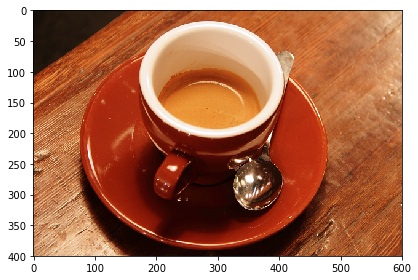

In [8]:
img = data.coffee()
imshow(img)

In [45]:
def show_images(images, cols = 1, titles = None):
    
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()            
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

 ## Стандартный фильтр для выделения скачков яркости

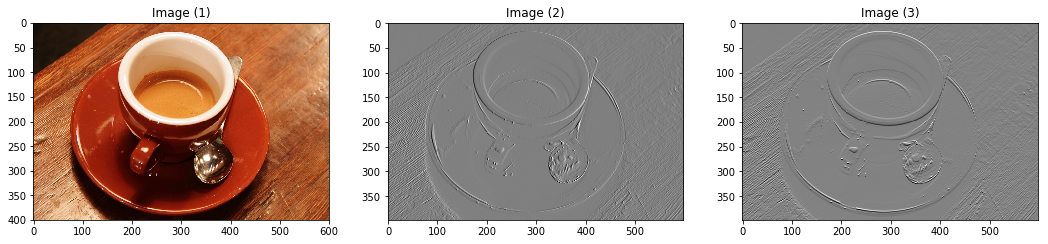

In [46]:
Dx = np.array([[ 0, 0, 0], 
               [-1, 0, 1], 
               [ 0, 0, 0]])

Dy = np.array([[0,  1, 0], 
               [0,  0, 0], 
               [0, -1, 0]])

img_Dx = convolve2d(rgb2gray(img), Dx, mode = "valid")
img_Dy = convolve2d(rgb2gray(img), Dy, mode = "valid")

show_images([img, img_Dx, img_Dy])

## Фильтр Превитта

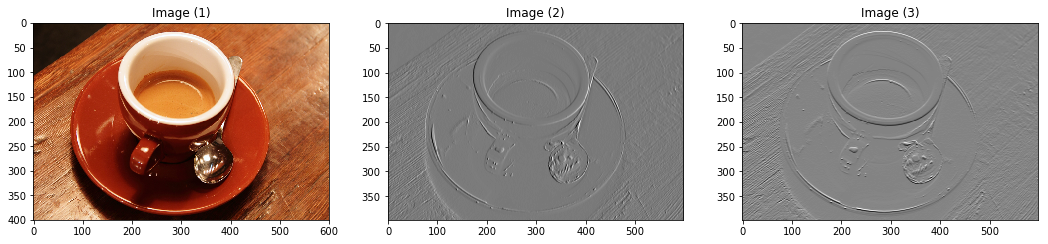

In [47]:
Px = np.array([[-1, 0, 1], 
               [-1, 0, 1], 
               [-1, 0, 1]])

Py = np.array([[ 1,  1,  1], 
               [ 0,  0,  0], 
               [-1, -1, -1]])

img_Px = convolve2d(rgb2gray(img), Px, mode = "valid")
img_Py = convolve2d(rgb2gray(img), Py, mode = "valid")

show_images([img, img_Px, img_Py])

##  Фильтр Собеля

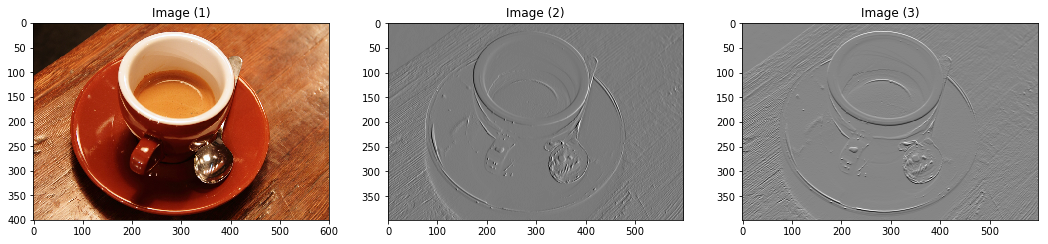

In [48]:
Sx = np.array([[-1, 0, 1], 
                      [-2, 0, 2], 
                      [-1, 0, 1]])

Sy = np.array([[ 1,  2,  1], 
                      [ 0,  0,  0], 
                      [-1, -2, -1]])

img_Sx = convolve2d(rgb2gray(img), Sx, mode = "valid")
img_Sy = convolve2d(rgb2gray(img), Sy, mode = "valid")

show_images([img, img_Sx, img_Sy])

## Разностный аналог Лапласиана

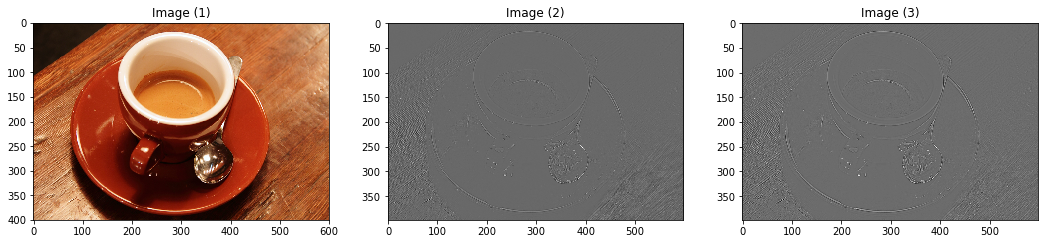

In [49]:
L1 = np.array([[ 0, -1,  0], 
               [-1,  4, -1], 
               [ 0, -1,  0]])

L2 = np.array([[-1, -1, -1], 
               [-1,  8, -1], 
               [-1, -1, -1]])

img_L1 = convolve2d(rgb2gray(img), L1, mode = "valid")
img_L2 = convolve2d(rgb2gray(img), L2, mode = "valid")

show_images([img, img_L1, img_L2])

## Фильтр тиснения

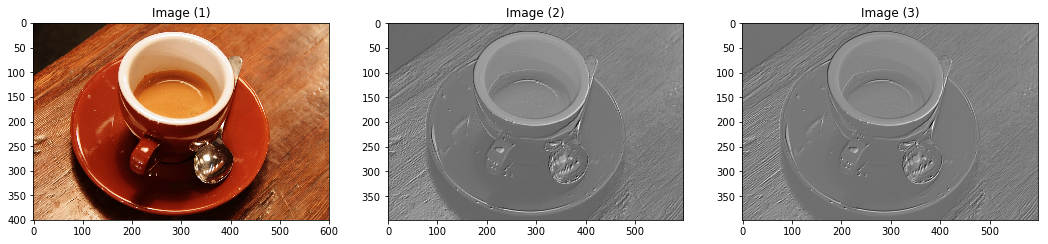

In [50]:
E1 = np.array([[-2, 0, 0], 
               [ 0, 1, 0], 
               [ 0, 0, 2]])

E2 = np.array([[-2, -1, 0], 
               [-1,  1, 1], 
               [ 0,  1, 2]])

img_E1 = convolve2d(rgb2gray(img), E1, mode = "valid")
img_E2 = convolve2d(rgb2gray(img), E2, mode = "valid")

show_images([img, img_E1, img_E2])

## Фильтр повышения резкости

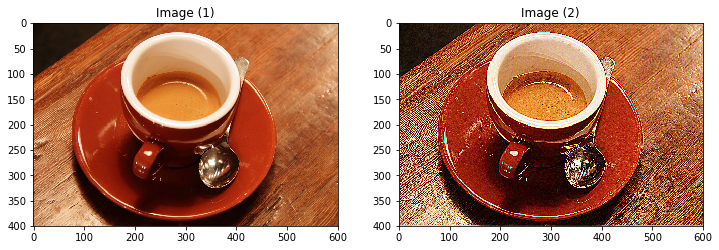

In [51]:
def high_contrast(img):
    img = rgb2yuv(img)
    Y, U, V = img[:,:,0], img[:,:,1], img[:,:,2]
    
    Y = convolve2d(Y, hc, mode = "same")
    U = convolve2d(U, hc, mode = "same")
    V = convolve2d(V, hc, mode = "same")
    Y = np.clip(Y, 0, 1)
    img = np.clip(yuv2rgb(np.dstack((Y,U,V))), 0, 1)
    
    return img

hc = np.array([[-1, -1, -1], 
               [-1,  9, -1], 
               [-1, -1, -1]])

img_hc = convolve2d(rgb2gray(img), hc, mode = "valid")

show_images([img, high_contrast(img)])